In [1]:
import random
import timeit
import matplotlib.pyplot as plt
import csv

import algos
import viz
import plot

from cluster import Cluster as Cluster

Loaded 3108 data points
Displaying 15 sequential clusters


In [2]:
def gen_random_clusters(num_clusters):
    clusters = []
    for i in range(num_clusters):
        x = 2 * random.random() - 1
        y = 2 * random.random() - 1
        clusters.append(Cluster(set(['0']), x, y, 1, 1))
        
    return clusters

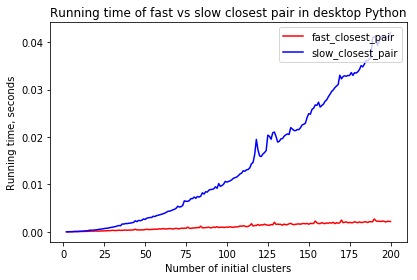

In [3]:
xs = range(2, 201)
ys_fast = []
ys_slow = []
for n in xs:
    clusters = gen_random_clusters(n)
    ys_fast.append(timeit.timeit(lambda: algos.fast_closest_pair(clusters), number=1))
    ys_slow.append(timeit.timeit(lambda: algos.slow_closest_pair(clusters), number=1))

plt.plot(xs, ys_fast, '-r', label='fast_closest_pair')
plt.plot(xs, ys_slow, '-b', label='slow_closest_pair')
plt.title('Running time of fast vs slow closest pair in desktop Python')
plt.xlabel('Number of initial clusters')
plt.ylabel('Running time, seconds')
plt.legend(loc='upper right')
plt.tight_layout()

Loaded 3108 data points
Displaying 15 clusters


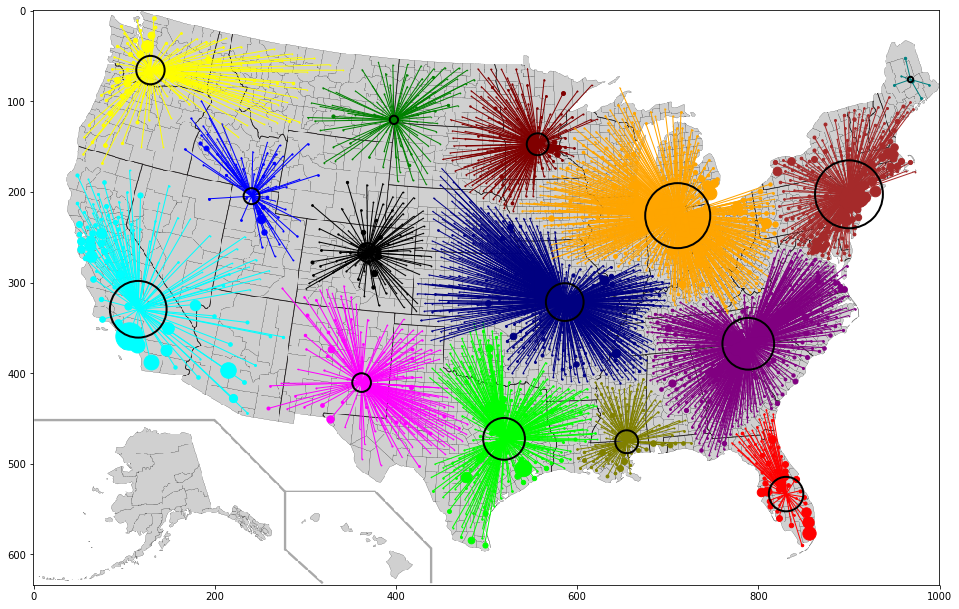

In [4]:
def visualize(datafile, algo):
    data_table = viz.load_data_table(datafile)
    clusters = [Cluster(set([x[0]]), x[1], x[2], x[3], x[4]) for x in data_table]
    clusters = algo(clusters)
    print("Displaying " + str(len(clusters)) + " clusters")
    plot.plot_clusters(data_table, clusters, True)
    return clusters
visualize(viz.DATA_3108_URL, lambda x: algos.hierarchical_clustering(x, 15))
plt.show()

In [ ]:
visualize(viz.DATA_3108_URL)